# 09-1 순차 데이터와 순환 신경망
순차 데이터의 특징을 알고 순환 신경망의 개념을 학습한다.

## 순차 데이터

**순차 데이터**는 텍스트나 **시계열 데이터**(일정한 시간 간격으로 기록된 데이터)와 같이 순서에 의미가 있는 데이터를 말한다.

순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요하다. 예를 들어 '별로지만 추천해요'에서 '추천해요'가 입력될 때 '별로지만'을 기억하고 있어야 이 댓글을 무조건 긍정적이라고 판단하지 않을 것이다.

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. 즉, 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다.

이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망**(feedforward neural network)이라고 한다.

신경망이 이전에 처리했던 샘플을 다음 샘플로 처리하는데 재사용하기 위해서는 데이터 흐름이 앞으로만 전달되어서는 안된다. 다음 샘플을 위해서 이전 데이터가 신경망 층에 순활될 필요가 있는데, 이런 신경망을 **순환 신경망**이라 한다.

## 순환 신경망
**순환 신경망**(recurrent neural network, RNN)은 일반적인 완전 연결 신경망과 거의 비슷하다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다.

아래의 그림과 같이, 뉴런의 출력이 다시 자기 자신으로 전달되는데, 어떤 샘플이 처리할 때 바로 이전에 사용했던 데이터를 재사용한다는 것을 뜻한다.

순환 신경망에서는 **'이전 샘플에 대한 기억을 가지고 있다'**고 말하는데, 이렇게 샘플을 처리하는 한 단계를 **타임스텝**(timestep)이라고 말한다.


순환 신경망에서는 특별히 층을 **셀**(cell)이라고 부른다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 **은닉 상태**(hidden state)라 부른다.

합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있으나, 기본 구조는 같다. 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보내는 것이다. 차이점은 층의 출력(은닉 상태)을 다음 타임 스텝에 재사용한다는 것이다.

일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수(tanh)가 많이 사용된다. tanh 함수는 -1~1 사이의 범위를 가진다. 다른 신경망과 마찬가지로 순환 신경망 그림에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는다. 하지만 활성화 함수는 필수!

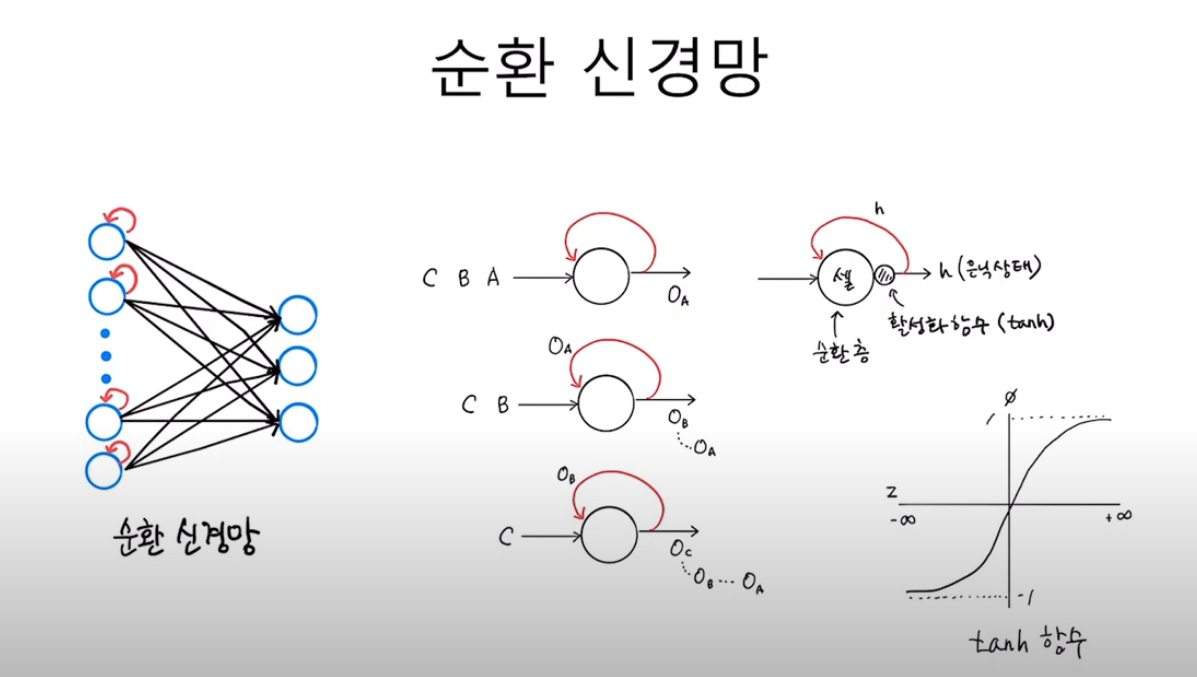

합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일하다. 하지만 순환 신경망의 뉴런은 이전 타임스텝의 은닉 상태에 곱해지는 가중치가 추가로 존재한다. 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.

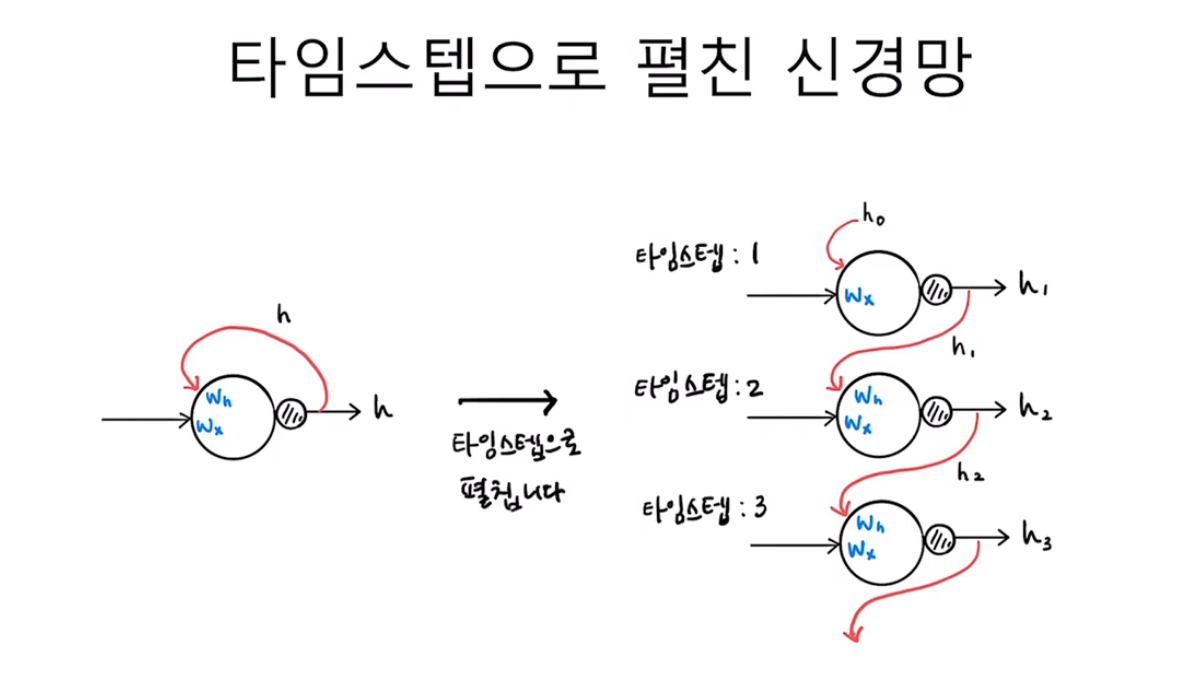

## 셀의 가중치와 입출력
1. 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 Wx의 크기는 4*3=12이다.
1. 순환층에서 다음 타입스텝에 재사용되는 은닉 상태를 위한 가중치 Wb는 3*3=9이다.
1. 모델 파라미터 수 = Wx + Wb + 절편 = 12 + 9 + 3 = 24

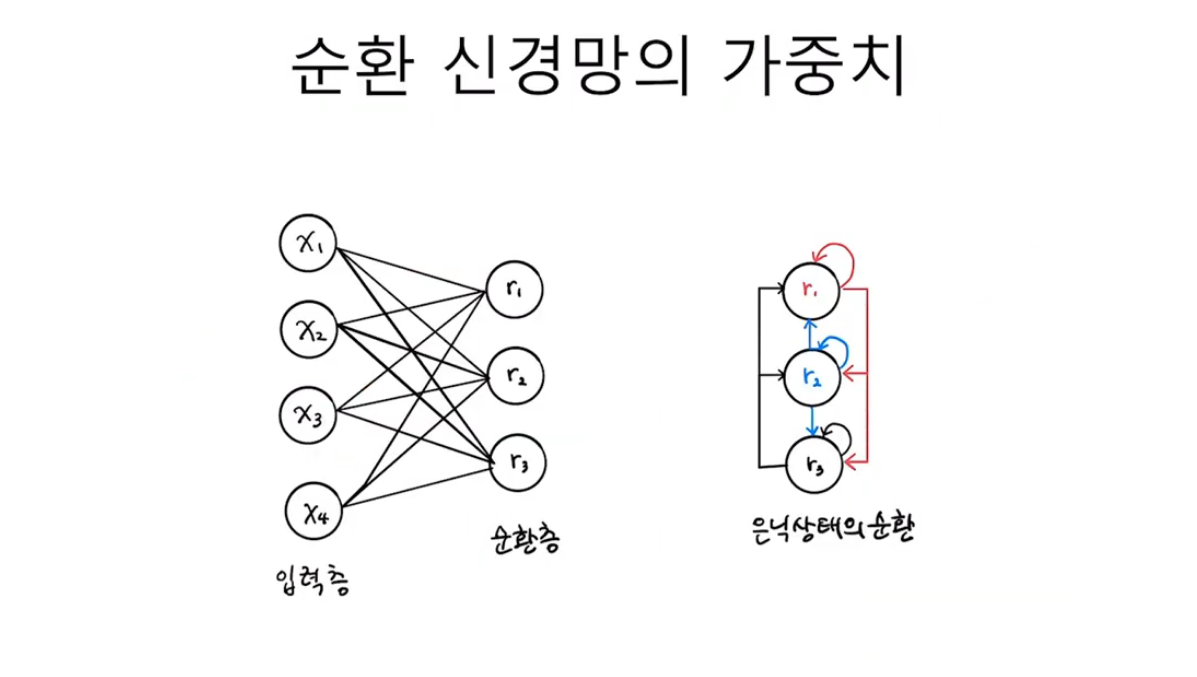

*순환층의 입력과 출력에 대해 살펴보자.*

예를 들어 어떤 샘플에 "I am a boy"란 문장이 들어 있다고 가정해보자. 이런 **입력**이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력된다.

순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 **출력**으로 내보낸다. 그리고 여러 개의 층이 쌓인 순환 신경망의 경우는, 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉 상태를 출력한다. 예를들어 2개의 순환층을 쌓은 경우에는 아래 그림과 같다.

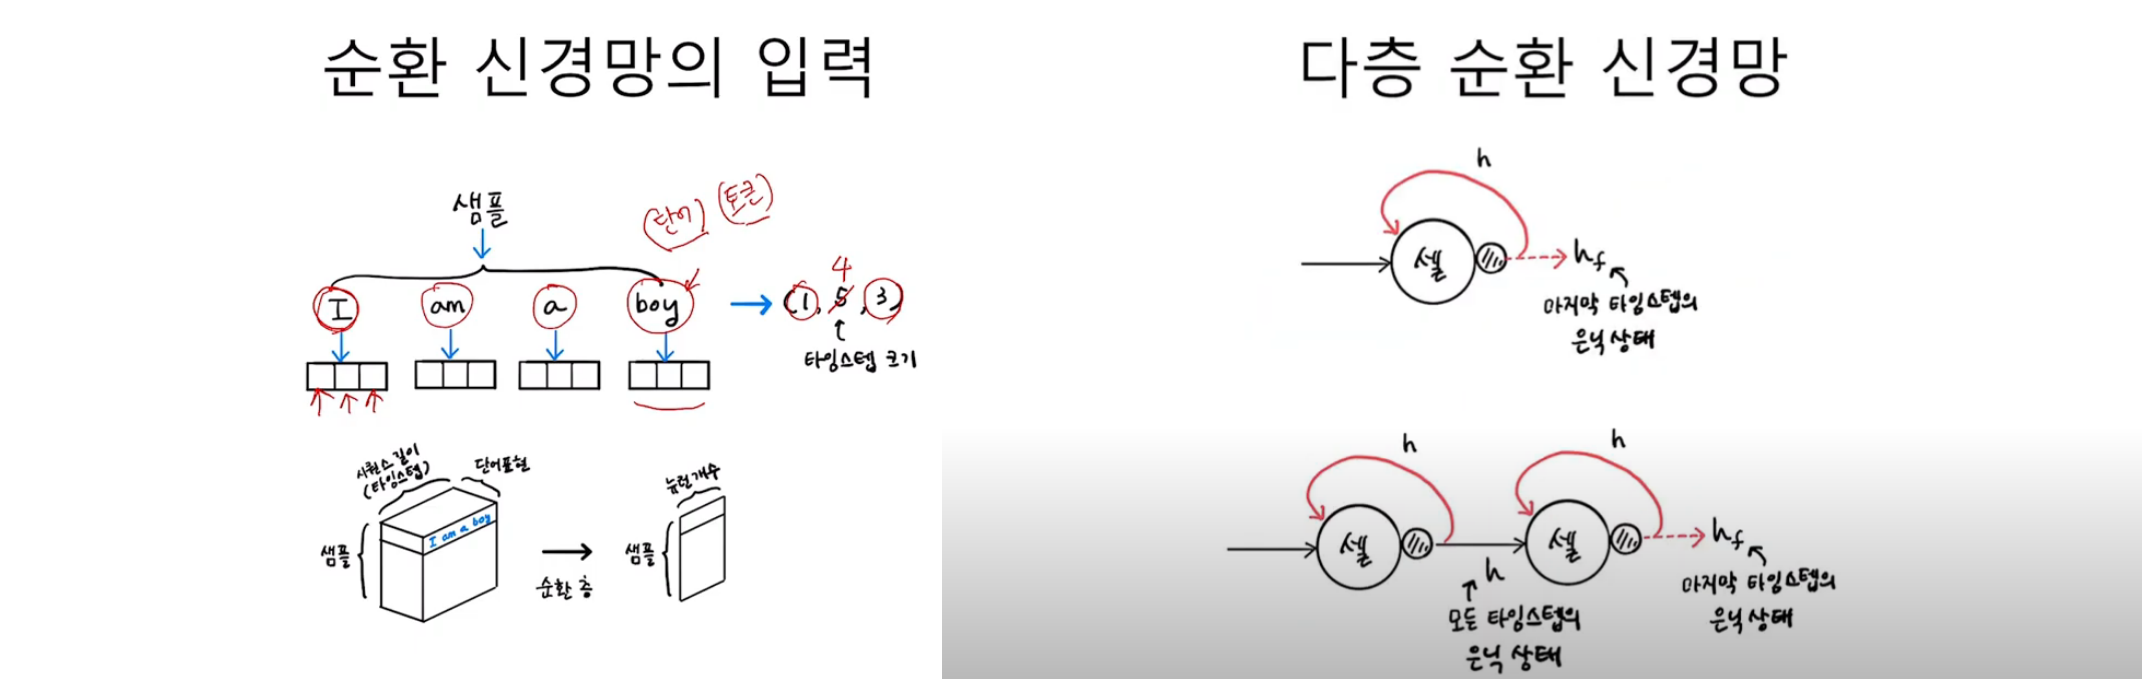

마지막으로 출력층의 구성에 대해 알아보자.

합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다. 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용한다. 이진 분류는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용한다.

아래의 예시에서 샘플은 20개의 타입스텝으로 이루어져 있으며, 각 타임스텝은 100개의 표현 또는 특성으로 이루어져 있다. 이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉 상태만 출력하게 된다. 이 은닉 상태의 크기는 셀에 있는 뉴런의 개수가 되므로 (10, )이다.

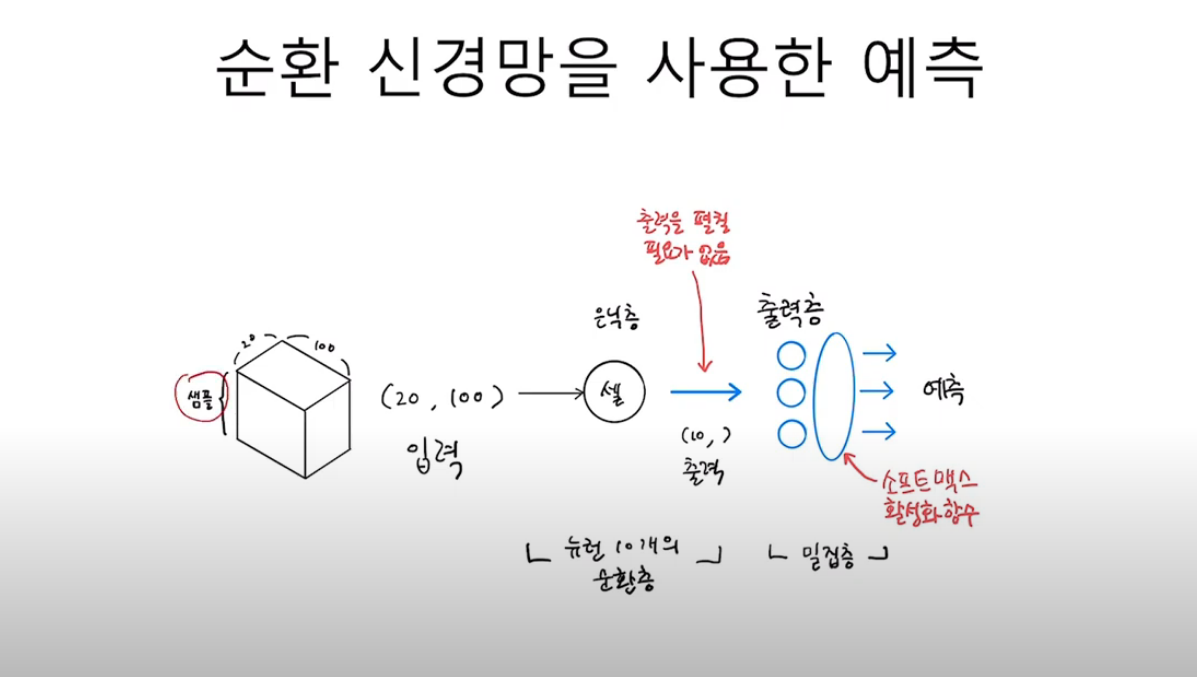